### Import Required libraries

In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly 

### load Dataset 

In [79]:
data = pd.read_csv('Titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:xlabel='Age'>

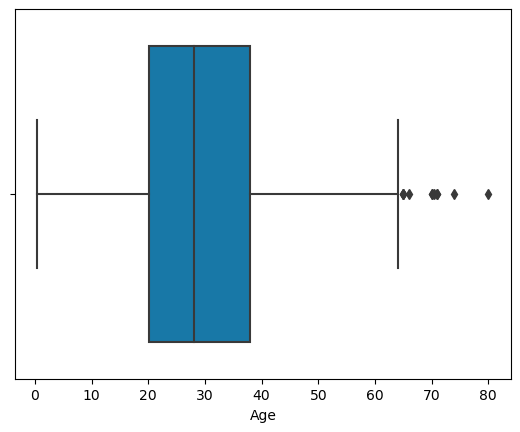

In [83]:
import matplotlib.pyplot as plt
#plt.figure(figsize=(12, 7))
sns.boxplot(x='Age',data=data,palette='winter')

In [81]:
Q1 = data['Age'].quantile(0.25)
Q3 = data['Age'].quantile(0.75)
IQR = Q3 - Q1

upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR

### Removing outliers

<AxesSubplot:xlabel='Age'>

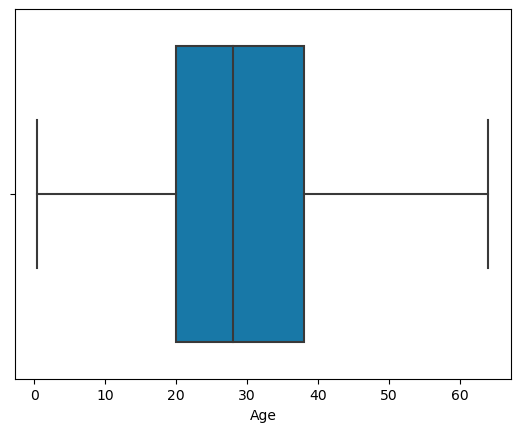

In [84]:
outlier_values = np.where(data['Age'] > upper, True, np.where(data['Age'] < lower, True, False))
data1 = data.iloc[~(outlier_values)]
sns.boxplot(x='Age',data=data1,palette='winter')

### Replacing outliers by extreme limits

<AxesSubplot:xlabel='Age'>

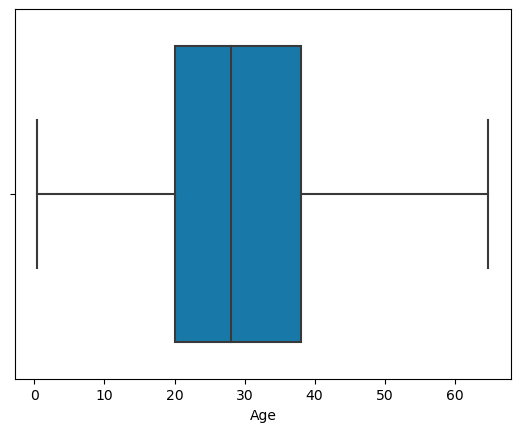

In [85]:
data2 = data
data2['Age'] = np.where(data2['Age'] > upper, upper, np.where(data2['Age'] < lower,lower, data2['Age']))
# numpy.where(condition[, x, y])
# If both x and y are specified, the output array contains elements of x where condition is True, and elements from y elsewhere.
sns.boxplot(x='Age',data=data2,palette='winter')   